# Project Featurization, Model Selection and Tuning

# Importing required libraries

In [1]:
##importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Context:
Concrete is the most important material in civil engineering.<br>
The concrete compressive strength is a highly nonlinear function of age and ingredients.<br>
These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

# Attribute Information:
1. Cement : measured in kg in a m3 mixture
2. Blast : measured in kg in a m3 mixture
3. Fly ash : measured in kg in a m3 mixture
4. Water : measured in kg in a m3 mixture
5. Superplasticizer : measured in kg in a m3 mixture
6. Coarse Aggregate : measured in kg in a m3 mixture
7. Fine Aggregate : measured in kg in a m3 mixture
8. Age : day (1~365)
9. Concrete compressive strength measured in MPa


Here the Concrete Compressive Strength is regressand.

# Reading the dataset and displaying the first 10 records of the dataset.

In [16]:
conc_data = pd.read_csv('concrete.csv') ##reading the dataframe
conc_data.head(10) ##showing the first 10 records from the dataset

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


# Checking the Shape and Type of the Data

In [17]:
rows=len(conc_data)
columns = len(conc_data.columns)
print('The dataset contains %d rows and %d columns.' %(rows,columns))
conc_data.info() #Displays the type of the columns that exist in the dataset

The dataset contains 1030 rows and 9 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Initial observations:
- All the variables are quantitative in nature.
- From the outlook, it seems that there are no missing values as all the columns are floats.<br>
However, there are few columns with 0s so further investigation needs to be done.

# Five Number Summary for the Numerical variables

In [18]:
conc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


- It seems that 25% of the records contain 0 in slag, ash and superplastic.
- This could be due to missing values.<br>However, tough to comment whether they are missing values or real values without domain knowledge.

Also, there are following columns with outliers (values above 1.5*IQR):
    - slag (slightly above the 1.5*IQR)
    - superplastic
    - age ( there are outliers as most of the data is collected in initial phase,<br> may not be a good idea to curate this column)
    - strength
    
 Let us look confirm the presence of the outliers using Box- Whisker plot of these variables.

# Checking the presence of Outliers in explanatory variables using Boxplot

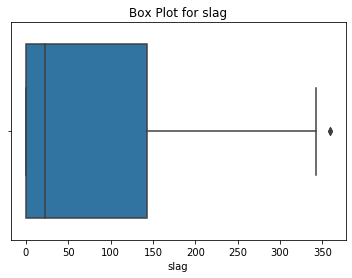

In [19]:
sns.boxplot(conc_data['slag']).set_title('Box Plot for slag');

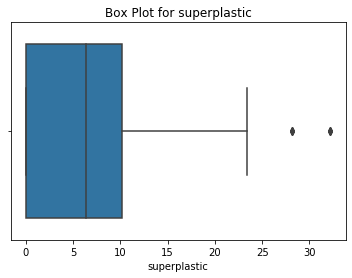

In [20]:
sns.boxplot(conc_data['superplastic']).set_title('Box Plot for superplastic');

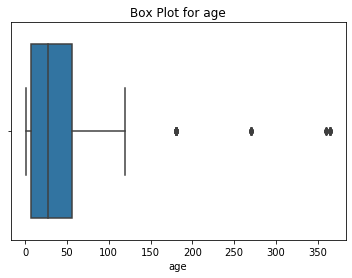

In [21]:
sns.boxplot(conc_data['age']).set_title('Box Plot for age');

There are few outliers in superplastic and slag.
I'm capping these values with q3+1.5*IQR value.

In [15]:
q1=np.percentile(conc_data['slag'], 25)
q3=np.percentile(conc_data['slag'], 75)
med=np.percentile(conc_data['slag'], 50)
IQR= q3-q1
upper_limit=q3+1.5*IQR
print('IQR = %d'%IQR)
print('Median = %d'%med)
print('Upper Limit %d'%upper_limit)
outliers=conc_data[conc_data['slag'] > upper_limit]
outlier_cnt=len(outliers)
print('No. of outliers based on slag = %d'%outlier_cnt)

#Replacing the outlier values with median
conc_data['slag'] = np.where(conc_data['slag'] > upper_limit, upper_limit, conc_data['slag'])
conc_data['slag'].describe()

IQR = 142
Median = 22
Upper Limit 357
No. of outliers based on slag = 2


count    1030.000000
mean       73.891893
std        86.266363
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       357.375000
Name: slag, dtype: float64

In [22]:
q1=np.percentile(conc_data['superplastic'], 25)
q3=np.percentile(conc_data['superplastic'], 75)
med=np.percentile(conc_data['superplastic'], 50)
IQR= q3-q1
upper_limit=q3+1.5*IQR
print('IQR = %d'%IQR)
print('Median = %d'%med)
print('Upper Limit %d'%upper_limit)
outliers=conc_data[conc_data['superplastic'] > upper_limit]
outlier_cnt=len(outliers)
print('No. of outliers based on superplastic = %d'%outlier_cnt)

#Replacing the outlier values with median
conc_data['superplastic'] = np.where(conc_data['superplastic'] > upper_limit, upper_limit, conc_data['superplastic'])
conc_data['superplastic'].describe()

IQR = 10
Median = 6
Upper Limit 25
No. of outliers based on superplastic = 10


count    1030.000000
mean        6.159029
std         5.802457
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        25.500000
Name: superplastic, dtype: float64

# Pair Plots for Numerical Attributes to see their relationships

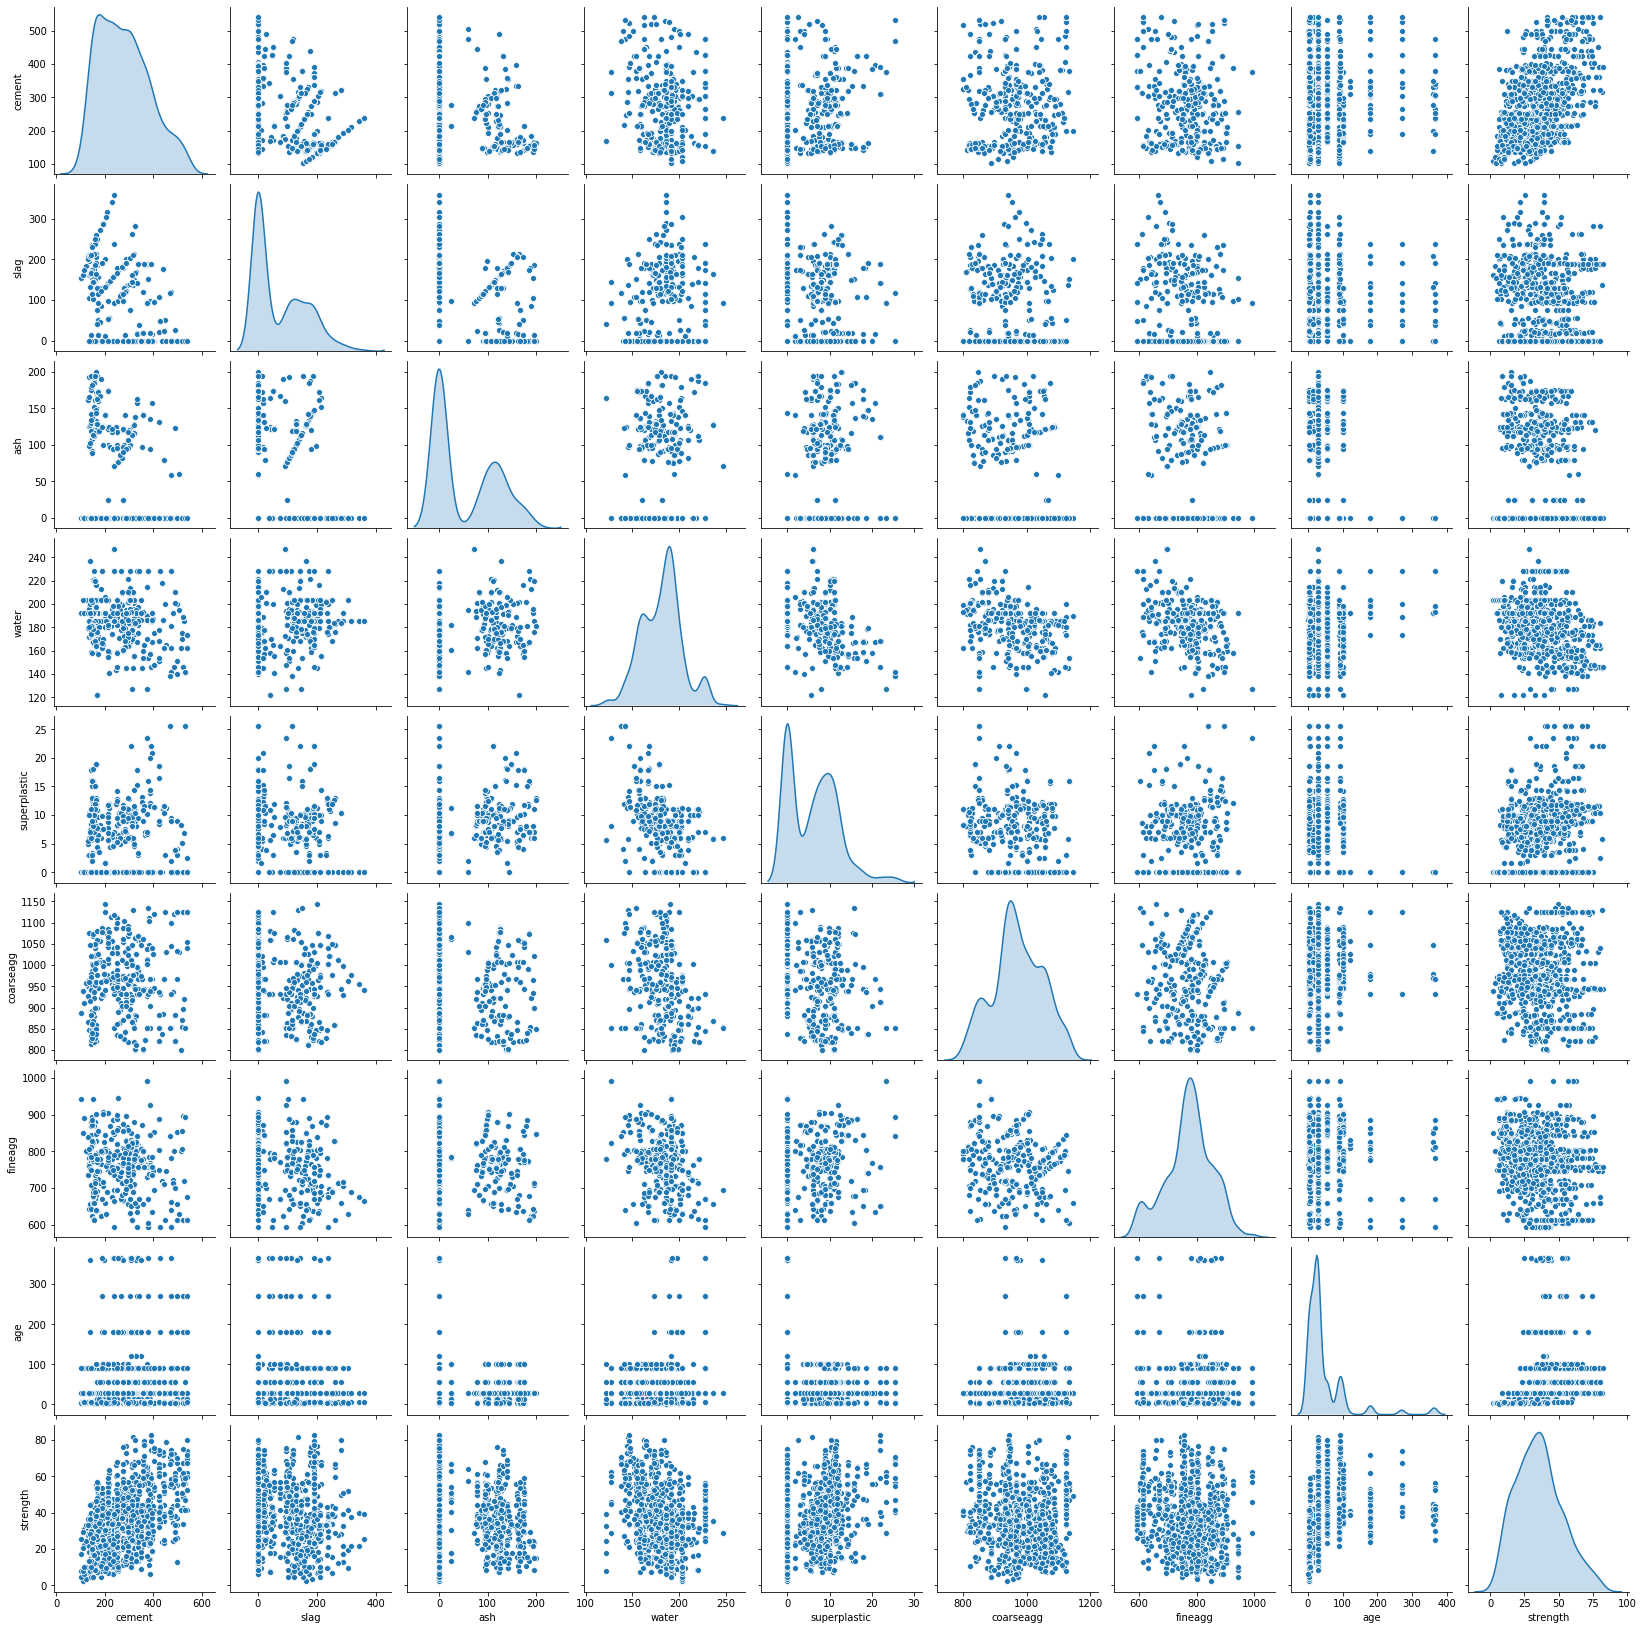

In [24]:
sns.pairplot(conc_data,diag_kind='kde');

# There seem to be  at least 3 Gaussians. (3 separate lines in scatter plot of ash and slag)

Let us look at the correlation between attributes

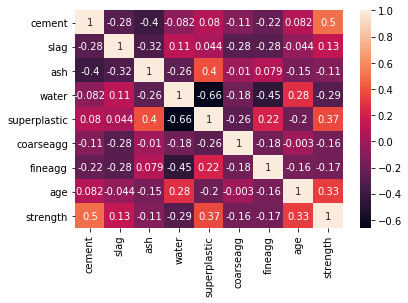

In [25]:

corrMatrix = conc_data.corr()
sns.heatmap(corrMatrix, annot=True);

Most of the attributes are poorly correlated.

The Regressand 'Strength' is slightly correlated with cement, age and superplastic.

After looking at the correlation matrix, i've decided against dropping any column.<br>
Instead, i might use quadratic models if simple models fail miserably.

# Let us split the data and create multiple models.

In [30]:
from scipy.stats import zscore

conc_data_attr =conc_data.loc[:, 'cement':'age']
conc_data_attr_z = conc_data_attr.apply(zscore)
print(conc_data_attr)
X= conc_data_attr_z.values
print(X)
y = conc_data.iloc[:,8]   
print(y)


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

      cement   slag    ash  water  superplastic  coarseagg  fineagg  age
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28
...      ...    ...    ...    ...           ...        ...      ...  ...
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28
1026   531.3    0.0    0.0  141.8          25.5      852.1    893.7    3
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7

[1030 rows x 8 columns]
[[-1.33901711  1.60144087 -0.84714393 ... -0.01439767 -0.31296991
  -0.27973311]
 [-1.07479007 -0.3

# Creating Decision Tree Regressor Model

In [38]:

# Import Decision Tree Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = conc_data_attr.columns[:]
print(feature_names)

print(feature_importances)

df = pd.DataFrame(feature_importances,feature_names)


Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.46405785 0.         0.         0.08815856 0.         0.
 0.         0.44778359]


In [41]:
df.sort_values(by=0,ascending =False)

,0
cement,0.464058
age,0.447784
water,0.088159
slag,0.000000
ash,0.000000
superplastic,0.000000
coarseagg,0.000000
fineagg,0.000000


It seems only cement, age and water better explain the strength.

0.6358072763408258
0.583104124329016


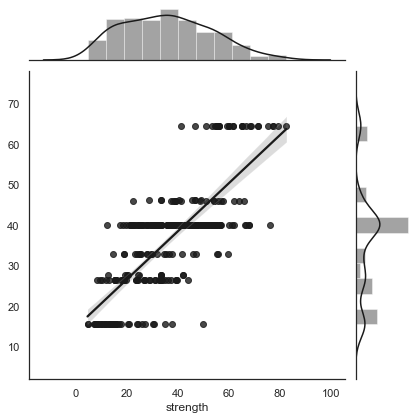

In [44]:

print(regressor.score(X_train, y_train))

print(regressor.score(X_test, y_test))

y_pred = regressor.predict(X_test)
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

Decision Tree Regressor is not working at all.<br>

In fact, Linear model might not work.
<br>Hence, Quadratic models will be built in next steps.


# Creating Non Linear Models

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(conc_data_attr_z)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

In [56]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print(regression_model.coef_)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))


from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

[ 2.96852979e-17  1.35294558e+01  1.02023878e+01  6.00611363e+00
 -1.54076613e+00  4.27295461e+00  1.29650466e+00  2.59329325e+00
  1.50604846e+01  8.09767761e-01  1.18636557e+00 -3.98110917e+00
 -1.66176317e+00  3.18751691e-01  5.97135765e-01  2.82079410e+00
  1.76955882e+00 -1.73843481e+00  5.62138608e-01  3.30133069e-01
  2.07337365e+00  4.18202927e+00 -2.44315740e+00 -2.14833339e+00
  1.79997153e-01  1.90473157e+00  6.46101353e+00  2.21879904e+00
 -1.05491678e+00 -4.12716021e-01 -7.67758388e-01  1.96017737e+00
  1.07390322e+00  2.87263683e+00  1.58366914e+00 -1.65278069e-01
  1.87146774e+00]
Ridge model: [ 0.         13.37419425 10.04376722  5.86815543 -1.65209628  4.26467634
  1.20605529  2.4576465  15.02788809  0.80026996  1.18763266 -3.93126457
 -1.64533387  0.32689057  0.5981674   2.67546171  1.7512908  -1.71047054
  0.56959877  0.32209775  2.06528555  4.06919792 -2.38941257 -2.14777806
  0.1910125   1.91131962  6.31055924  2.21837261 -1.03775323 -0.40979561
 -0.8457123   1.950

In [57]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7559918264219859
0.7441391735993144
0.7559802831288654
0.7441198653862607
0.7557899053357434
0.7438258493268256


The Model with Polynomial Features with degre 2 has the highest Coefficient of Detemination on Test data with 74.42%.

# Let us build model with cubic functions to see if we can improve the model performance.

In [59]:
poly = PolynomialFeatures(degree = 3, interaction_only=True)
X_poly = poly.fit_transform(conc_data_attr_z)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.8159825940163786
0.7234092424245874


It has started to fall into the zone of overfitting as Test has much lower coefficient of determination.<br>
Hence, it would be better to stick with Quadratic model.

# Let us cross validate the polynomial feature model with degree 2.

In [65]:
poly = PolynomialFeatures(degree = 3, interaction_only=True)
X_poly = poly.fit_transform(conc_data_attr_z)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

num_folds = 10
seed = 1
from sklearn.model_selection import KFold
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LinearRegression()
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, X_poly, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.70500424 0.72321126 0.8081029  0.61618473 0.68600381 0.76253826
 0.79352341 0.74382234 0.70528785 0.76413435]
Accuracy: 73.078% (5.359%)


C:\Users\Maneesh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## The average Coefficient of determination is around 73%.
## However, the biggest setback is the standard deviation of the R- square.
## 95% confidence interval of R-square is 63% to 83%.